# Get number of employees / salary median / salary average

In [140]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
url = 'https://mops.twse.com.tw/mops/web/ajax_t100sb15'
payload = {
    'encodeURIComponent': '1',
    'step': '1',
    'firstin': '1',
    'TYPEK': 'sii',
    'RYEAR': 112
}


In [145]:
x_salary = pd.DataFrame()
for i in range(107, 113):
    payload['RYEAR'] = i
    res = requests.post(url, data = payload)
    dfs = pd.read_html(res.text)
    df = dfs[0]
    df = df.iloc[:, [1, 2, 4, 5, 7]].copy()
    df.columns = ['公司代號', '公司名稱', '員工人數', '平均數(k)', '中位數(k)']
    df['年份'] = i
    x = df.loc[df['公司名稱'] == '']
    x_salary = pd.concat([x_salary, x], ignore_index=True)
    

C:\Users\jyunyang\AppData\Local\Temp\ipykernel_26588\4058705540.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(res.text)
C:\Users\jyunyang\AppData\Local\Temp\ipykernel_26588\4058705540.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(res.text)
C:\Users\jyunyang\AppData\Local\Temp\ipykernel_26588\4058705540.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(res.text)
C:\Users\jyunyang\AppData\Local\Temp\ipykernel_26588\4058705540.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a

In [ ]:
df = pd.read_csv("x_annual_revenue.csv")
combined_df = pd.merge(x_salary, df, left_on=['公司名稱', '年份'], right_on=['公司名稱', '日期'], how='left')
combined_df.drop(['公司代號', '日期','當月營收' , '去年當月營收', '去年累計營收'], axis=1, inplace=True)
combined_df = pd.DataFrame(combined_df)
combined_df

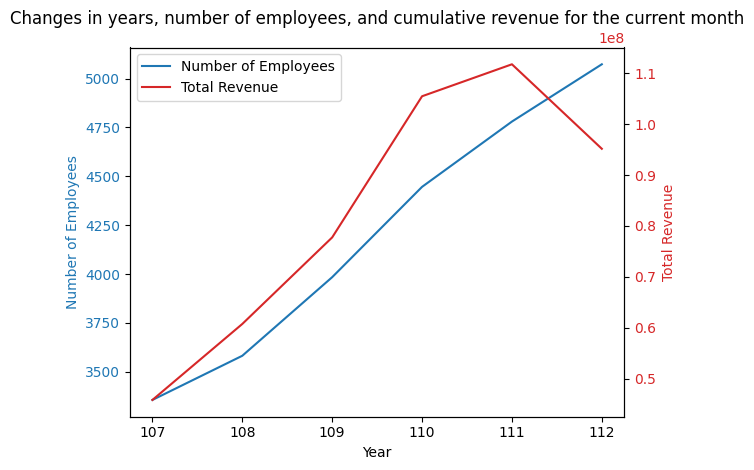

In [143]:
fig, ax1 = plt.subplots()

# 設置 x 軸
ax1.set_xlabel('Year')

# 設置 y 軸1 (員工人數)
ax1.set_ylabel('Number of Employees', color='tab:blue')
ax1.plot(combined_df['年份'], combined_df['員工人數'], color='tab:blue', label='Number of Employees')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 設置 y 軸2 (當月累計營收)
ax2 = ax1.twinx()  
ax2.set_ylabel('Total Revenue', color='tab:red')  
ax2.plot(combined_df['年份'], combined_df['當月累計營收'], color='tab:red', label='Total Revenue')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 設置圖標題
plt.title('Changes in years, number of employees, and cumulative revenue for the current month')

# 添加圖例
fig.tight_layout()  
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# 顯示圖表
plt.show()